In [1]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [ ]:
ticker_symbol = 'BAJAJFINSV.NS'
data= yf.download(ticker_symbol, start = '2019-01-01', end = '2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BAJAJFINSV.NS,BAJAJFINSV.NS,BAJAJFINSV.NS,BAJAJFINSV.NS,BAJAJFINSV.NS,BAJAJFINSV.NS
Date,,,,,,
2019-01-01 00:00:00+00:00,650.470459,652.195007,653.000000,641.799988,651.500000,1418210
2019-01-02 00:00:00+00:00,636.711975,638.400024,652.599976,636.000000,647.500000,2212740
2019-01-03 00:00:00+00:00,636.642151,638.330017,647.989990,633.164978,643.900024,2158450
2019-01-04 00:00:00+00:00,639.349915,641.044983,646.000000,635.700012,641.994995,1563230
2019-01-07 00:00:00+00:00,639.020752,640.715027,650.000000,638.500000,645.049988,1032170


In [ ]:
data.to_csv('bajaj_finserv_stock_data (2).csv')

In [ ]:
data = pd.read_csv('bajaj_finserv_stock_data (2).csv', skiprows=[1])
data = data.rename(columns={'Price': 'Date'})

data['Date'] = data['Date'].shift(-1)


data = data.dropna(subset=['Date'])


data.to_csv('cleaned_file.csv', index=False)
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02 00:00:00+00:00,650.470459,652.195007,653.000000,641.799988,651.500000,1418210.0
2,2019-01-03 00:00:00+00:00,636.711975,638.400024,652.599976,636.000000,647.500000,2212740.0
3,2019-01-04 00:00:00+00:00,636.642151,638.330017,647.989990,633.164978,643.900024,2158450.0
4,2019-01-07 00:00:00+00:00,639.349915,641.044983,646.000000,635.700012,641.994995,1563230.0


In [ ]:
cols = list(data)[1:6]
cols

['Adj Close', 'Close', 'High', 'Low', 'Open']

In [ ]:
scaler = StandardScaler()

In [ ]:
data_for_training = data[cols].astype(float)

In [ ]:
scaler = scaler.fit(data_for_training)
df_for_training_scaled = scaler.transform(data_for_training)

In [ ]:
Xtrain = []
ytrain = []
n_future = 1 # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [ ]:
df_for_training_scaled.shape

(1235, 5)

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    Xtrain.append(df_for_training_scaled[i - n_past:i, 0:data_for_training.shape[1]])
    ytrain.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
Xtrain, ytrain = np.array(Xtrain), np.array(ytrain)
print('Xtrain shape == {}.'.format(Xtrain.shape))
print('ytrain shape == {}.'.format(ytrain.shape))

Xtrain shape == (1221, 14, 5).
ytrain shape == (1221, 1).


In [ ]:
Xtrain = np.delete(Xtrain, 0, axis=0)
ytrain = np.delete(ytrain, 0, axis=0)

In [ ]:
print("Are there any NaN values in ytrain?:", np.isnan(ytrain).any())
print("Are there any infinite values in ytrain?:", np.isinf(ytrain).any())

Are there any NaN values in ytrain?: False
Are there any infinite values in ytrain?: False


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(ytrain.shape[1]))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 14, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(Xtrain, ytrain, epochs = 10, batch_size = 16, validation_split = 0.1, verbose = 1)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3396 - val_loss: 0.0270
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0571 - val_loss: 0.0250
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0428 - val_loss: 0.0151
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0433 - val_loss: 0.0080
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0395 - val_loss: 0.0166
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0359 - val_loss: 0.0134
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0346 - val_loss: 0.0062
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0328 - val_loss: 0.0132
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0428 - val_loss: 0.0053
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0325 - val_loss: 0.0146


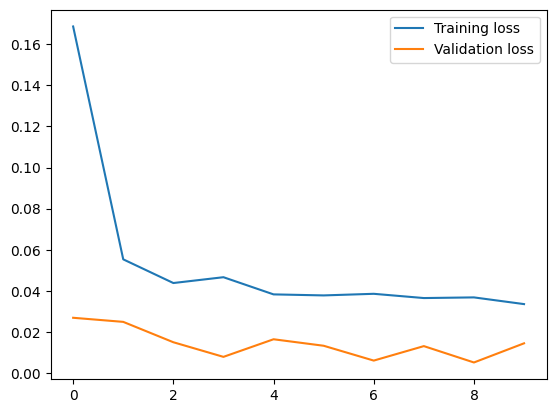

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02 00:00:00+00:00,650.470459,652.195007,653.000000,641.799988,651.500000,1418210.0
2,2019-01-03 00:00:00+00:00,636.711975,638.400024,652.599976,636.000000,647.500000,2212740.0
3,2019-01-04 00:00:00+00:00,636.642151,638.330017,647.989990,633.164978,643.900024,2158450.0
4,2019-01-07 00:00:00+00:00,639.349915,641.044983,646.000000,635.700012,641.994995,1563230.0


In [ ]:
n_future = 120  # Number of future days to forecast
last_date = data.index[-1]  # Get the last date directly from the DataFrame index
forecast_period_dates = pd.date_range(start=last_date, periods=n_future + 1, freq='D')[1:]  # Exclude the last date
print(forecast_period_dates)

DatetimeIndex(['2023-12-30 00:00:00+00:00', '2023-12-31 00:00:00+00:00',
               '2024-01-01 00:00:00+00:00', '2024-01-02 00:00:00+00:00',
               '2024-01-03 00:00:00+00:00', '2024-01-04 00:00:00+00:00',
               '2024-01-05 00:00:00+00:00', '2024-01-06 00:00:00+00:00',
               '2024-01-07 00:00:00+00:00', '2024-01-08 00:00:00+00:00',
               ...
               '2024-04-18 00:00:00+00:00', '2024-04-19 00:00:00+00:00',
               '2024-04-20 00:00:00+00:00', '2024-04-21 00:00:00+00:00',
               '2024-04-22 00:00:00+00:00', '2024-04-23 00:00:00+00:00',
               '2024-04-24 00:00:00+00:00', '2024-04-25 00:00:00+00:00',
               '2024-04-26 00:00:00+00:00', '2024-04-27 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=120, freq='D')


In [ ]:
forecast = model.predict(Xtrain[-n_future:])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
forecast_copies = np.repeat(forecast, data_for_training.shape[1], axis=-1)


In [ ]:
y_pred_future = scaler.inverse_transform(forecast_copies)[:, 0]
y_pred_future

array([1518.3704, 1542.3324, 1559.849 , 1570.4169, 1572.5138, 1571.0488,
       1566.201 , 1566.0634, 1568.978 , 1569.8397, 1570.8435, 1576.3683,
       1582.7018, 1585.0354, 1590.2073, 1595.7668, 1594.9623, 1589.693 ,
       1575.832 , 1561.465 , 1549.7661, 1530.8875, 1504.9825, 1482.2067,
       1470.1552, 1466.9335, 1469.3938, 1473.2988, 1475.4847, 1471.0527,
       1463.1705, 1456.5771, 1449.5349, 1446.2787, 1446.6597, 1446.3322,
       1447.2589, 1452.4628, 1460.434 , 1467.8931, 1473.8344, 1474.6857,
       1477.1809, 1480.9606, 1483.3141, 1485.6216, 1488.2181, 1495.0293,
       1503.3104, 1508.883 , 1512.7207, 1516.6057, 1516.8967, 1518.0791,
       1519.8221, 1514.2115, 1510.9867, 1516.8517, 1523.3318, 1526.9146,
       1524.8746, 1519.7915, 1517.105 , 1512.7915, 1510.2207, 1525.6855,
       1545.2404, 1563.9857, 1579.5355, 1587.4507, 1592.368 , 1595.9382,
       1601.8246, 1601.306 , 1594.8628, 1589.6821, 1583.2377, 1575.4   ,
       1557.9918, 1543.786 , 1530.4436, 1524.0726, 

In [ ]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'Date': np.array(forecast_dates), 'Open': y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
print(data.columns)


MultiIndex([('Adj Close', 'BAJAJFINSV.NS'),
            (    'Close', 'BAJAJFINSV.NS'),
            (     'High', 'BAJAJFINSV.NS'),
            (      'Low', 'BAJAJFINSV.NS'),
            (     'Open', 'BAJAJFINSV.NS'),
            (   'Volume', 'BAJAJFINSV.NS')],
           names=['Price', 'Ticker'])


In [ ]:
if ('Date', '') in data.columns:
    data[('Date', '')] = pd.to_datetime(data[('Date', '')], errors='coerce')
else:
    print("Column ('Date', '') not found.")


try:
    original = data[[('Date', ''), ('Open', 'BAJAJFINSV.NS')]].copy()
except KeyError as e:
    print(f"KeyError: {e}")
    print("Available columns are:")
    print(data.columns)


if 'original' in locals():

    original.columns = ['Date', 'Open']


    original = original[original['Date'] >= '2023-01-01']


    print(original.head())


Column ('Date', '') not found.
KeyError: "[('Date', '')] not in index"
Available columns are:
MultiIndex([('Adj Close', 'BAJAJFINSV.NS'),
            (    'Close', 'BAJAJFINSV.NS'),
            (     'High', 'BAJAJFINSV.NS'),
            (      'Low', 'BAJAJFINSV.NS'),
            (     'Open', 'BAJAJFINSV.NS'),
            (   'Volume', 'BAJAJFINSV.NS')],
           names=['Price', 'Ticker'])


In [ ]:
# Print the columns of the data DataFrame
print("Available columns in data:")
print(data.columns)


Available columns in data:
MultiIndex([('Adj Close', 'BAJAJFINSV.NS'),
            (    'Close', 'BAJAJFINSV.NS'),
            (     'High', 'BAJAJFINSV.NS'),
            (      'Low', 'BAJAJFINSV.NS'),
            (     'Open', 'BAJAJFINSV.NS'),
            (   'Volume', 'BAJAJFINSV.NS')],
           names=['Price', 'Ticker'])


Original data is not available for plotting.


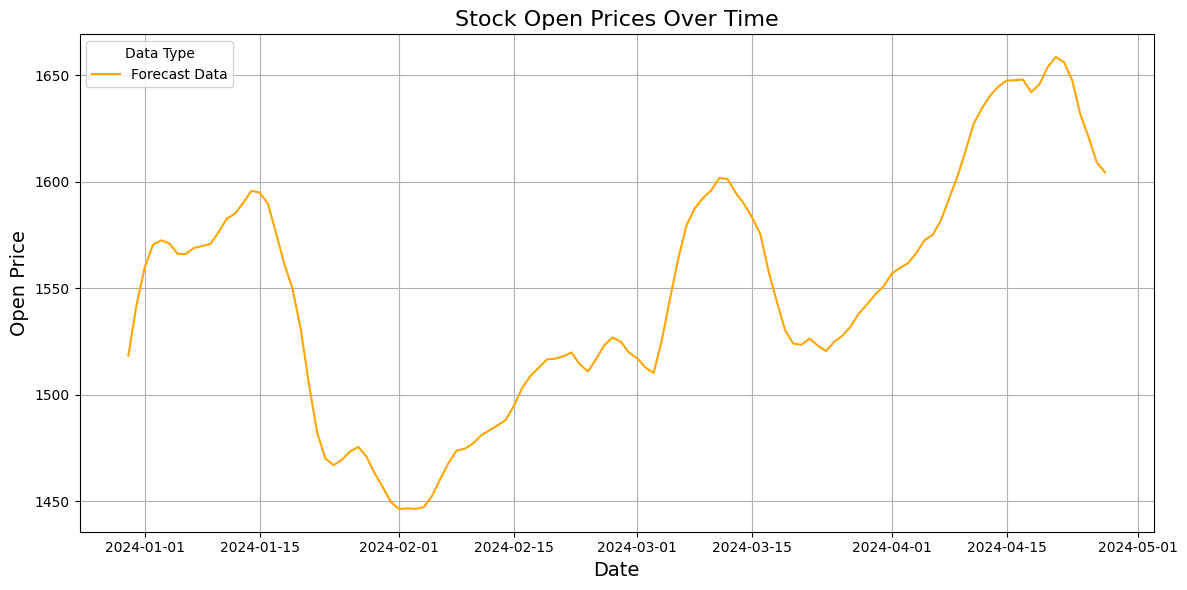

In [ ]:
plt.figure(figsize=(12, 6))

# Check if 'original' is defined before trying to plot it
if 'original' in locals() and not original.empty:
    sns.lineplot(x='Date', y='Open', data=original, label='Original Data', color='blue')
else:
    print("Original data is not available for plotting.")

sns.lineplot(x='Date', y='Open', data=df_forecast, label='Forecast Data', color='orange')

plt.title('Stock Open Prices Over Time', fontsize=16)  # Title of the plot
plt.xlabel('Date', fontsize=14)  # X-axis
plt.ylabel('Open Price', fontsize=14)  #Y-axis

plt.legend(title='Data Type')

plt.grid(True)
plt.tight_layout()
plt.show()